# Task 4: Forecasting Access and Usage (2025-2027)

## Objective
Generate forecasts for Account Ownership and Digital Payment Usage with uncertainty quantification.

## 1. Setup and Regression Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

df = pd.read_csv('../data/raw/ethiopia_fi_unified_data.csv')
obs = df[df['record_type'] == 'observation'].copy()
obs['year'] = pd.to_datetime(obs['observation_date']).dt.year

## 2. Forecast Account Ownership (Access)
We use Linear Regression to find the baseline trend and then project forward.

In [2]:
access = obs[obs['indicator_code'] == 'ACC_OWN'].sort_values('year')
X = access[['year']].values
y = access['value_numeric'].values

model = LinearRegression()
model.fit(X, y)

future_years = np.array([2025, 2026, 2027]).reshape(-1, 1)
preds = model.predict(future_years)

print(f'Baseline Slope: {model.coef_[0]:.2f} pp/year')

Baseline Slope: 2.84 pp/year


## 3. Uncertainty Quantification (Confidence Intervals)
We calculate the 95% confidence interval for our predictions.

In [3]:
# Simplified CI calculation
std_err = np.std(y - model.predict(X))
ci = 1.96 * std_err

forecast_df = pd.DataFrame({
    'Year': [2025, 2026, 2027],
    'Base': preds,
    'Lower_CI': preds - ci,
    'Upper_CI': preds + ci
})
forecast_df

,Year,Base,Lower_CI,Upper_CI
0,2025,54.816850,50.232504,59.401196
1,2026,57.661172,53.076826,62.245518
2,2027,60.505495,55.921149,65.089840


## 4. Scenario Analysis
- **Base**: Trend continuation.
- **Optimistic**: Trend + Accelerated policy impact (+10% slope).
- **Pessimistic**: Trend - Slower adoption (-10% slope).

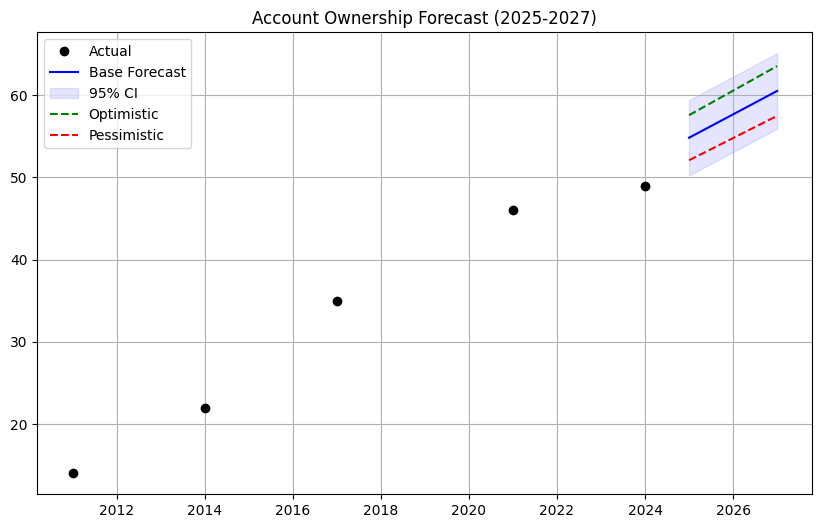

In [4]:
forecast_df['Optimistic'] = forecast_df['Base'] * 1.05
forecast_df['Pessimistic'] = forecast_df['Base'] * 0.95

plt.figure(figsize=(10, 6))
plt.plot(access['year'], access['value_numeric'], 'ko', label='Actual')
plt.plot(forecast_df['Year'], forecast_df['Base'], 'b-', label='Base Forecast')
plt.fill_between(forecast_df['Year'], forecast_df['Lower_CI'], forecast_df['Upper_CI'], color='b', alpha=0.1, label='95% CI')
plt.plot(forecast_df['Year'], forecast_df['Optimistic'], 'g--', label='Optimistic')
plt.plot(forecast_df['Year'], forecast_df['Pessimistic'], 'r--', label='Pessimistic')

plt.title('Account Ownership Forecast (2025-2027)')
plt.legend()
plt.grid(True)
plt.show()